# Chest X-Ray Images (Pneumonia)

**Pneumonia is a disease that leads to the death of individuals within a short period since the flow of fluid in the lungs. Hence, initial diagnosis and drugs are very important to avoid the progress of the disease.**
### *Content*
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

### **load important libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# deep learning libraries
import tensorflow as tf
import tensorflow.keras as tfk
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Input, Flatten, BatchNormalization,Dropout, SeparableConv2D
from tensorflow.keras.layers import ReLU, LeakyReLU, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

np.random.seed(42)

### **CONSTANTS**

In [2]:
# path of data
DATA_PATH = "../input/chest-xray-pneumonia/chest_xray/"
IMAGE_SIZE = 128
EPOCHS = 20
BATCH_SIZE = 32

Dataset of train/,- NORMAL IMAGES : 1341 - PNEUMONIA : 3875
Dataset of val/,- NORMAL IMAGES : 8 - PNEUMONIA : 8
Dataset of test/,- NORMAL IMAGES : 234 - PNEUMONIA : 390


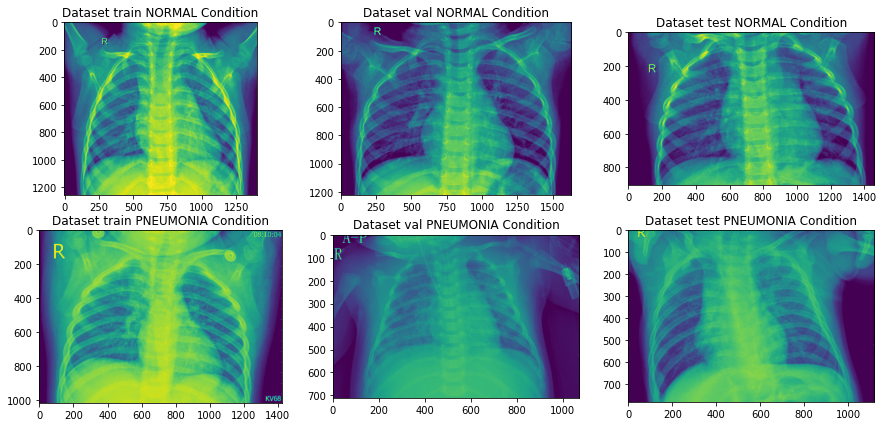

In [3]:
# show some information about data

for file in ['train/', 'val/', 'test/']:
    normals = len(os.listdir(DATA_PATH + file + 'NORMAL/'))
    pneumonia = len(os.listdir(DATA_PATH + file + 'PNEUMONIA/'))
    print("Dataset of {},- NORMAL IMAGES : {} - PNEUMONIA : {}".format(file, normals, pneumonia))
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,7))
# ax = ax.ravel()
# plt.tight_layout()
l = ['NORMAL', 'PNEUMONIA']

for i in range(2):
    for j, file in enumerate(['train', 'val', 'test']):
        img = os.listdir(DATA_PATH + file + '/{}/'.format(l[i]))[1]
#         print(img)
        ax[i, j].set_title("Dataset {} {} Condition".format(file, l[i]))
        ax[i, j].imshow(plt.imread(DATA_PATH + file + '/{}/'.format(l[i]) + img))

In [4]:
for img in (os.listdir(DATA_PATH + 'val' + '/NORMAL/')):
    print(img)

NORMAL2-IM-1431-0001.jpeg
NORMAL2-IM-1440-0001.jpeg
NORMAL2-IM-1442-0001.jpeg
NORMAL2-IM-1427-0001.jpeg
NORMAL2-IM-1430-0001.jpeg
NORMAL2-IM-1436-0001.jpeg
NORMAL2-IM-1438-0001.jpeg
NORMAL2-IM-1437-0001.jpeg


### **Data Pre-Procsessing**

In [5]:
def preprocessing(image_size, batch=32):
    trainDataGen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)
    valDataGen = ImageDataGenerator(rescale=1./255)
    
    train_generator = trainDataGen.flow_from_directory(
                        directory=DATA_PATH + 'train',
                        target_size=(image_size, image_size),
                        batch_size=batch,
                        class_mode='binary', shuffle=True)
    validation_generator = valDataGen.flow_from_directory(
                        directory=DATA_PATH + 'val',
                        target_size=(image_size, image_size),
                        batch_size=batch,
                        class_mode='binary', shuffle=True)
    
    testData = []
    testClasses = []
    c = 0
    for file in ['/NORMAL/', '/PNEUMONIA/']:
        for img in (os.listdir(DATA_PATH + 'test' + file)):
            image = plt.imread(DATA_PATH + 'test' + file + img)
            image = cv2.resize(image, (image_size, image_size))
            image = np.dstack([image, image, image])
            image = image.astype(np.float64) / 255.

            testData.append(image)


            if(file == '/NORMAL/'):
                c = 0
            else:
                c = 1

            testClasses.append(c)
        
        
    return train_generator, validation_generator, np.array(testData), np.array(testClasses)

## Build Model

In [6]:
# get data
train, valid, test, classes = preprocessing(IMAGE_SIZE, BATCH_SIZE)

# # Build Model
# # first initialization Sequential model
# model = tfk.models.Sequential()


# # first convolution layer
# model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu',padding = 'same', input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
# model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu',padding = 'same'))
# model.add(MaxPool2D(pool_size = (2, 2)))

          
# # Second convolution
# model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu',padding = 'same'))
# model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu',padding = 'same'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size = (2, 2)))

# # Third Convolution
# model.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu',padding = 'same'))
# model.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu',padding = 'same'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size = (2, 2)))

# # Fourth Convolution
# model.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu',padding = 'same'))
# model.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu',padding = 'same'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.3))



# # Fifth Convolution
# model.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu',padding = 'same'))
# model.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu',padding = 'same'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.5))


# # Fully Connected Layer
# model.add(Flatten())
# model.add(Dense(units = 256, activation='relu'))
# model.add(Dropout(0.7))

# model.add(Dense(units = 128, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units = 64, activation='relu'))
# model.add(Dropout(0.3))

# model.add(Dense(units = 1, activation='sigmoid'))


# model.compile(optimizer=tfk.optimizers.Adam(), loss='binary_crossentropy', metrics=tfk.metrics.Accuracy())


# model.fit(train, epochs=EPOCHS, batch_size=BATCH_SIZE, steps_per_epoch=train.samples // BATCH_SIZE,
#             validation_data=valid, validation_steps=valid.samples // BATCH_SIZE)
# # Callbacks
# checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
# lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')
# Input layer
inputs = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# First conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Second conv block
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Third conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Fourth conv block
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# Fifth conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=1, activation='sigmoid')(x)

# Creating model and compiling
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')

history = model.fit(
           train, steps_per_epoch=train.samples // BATCH_SIZE, 
           epochs=EPOCHS, validation_data=valid, 
           validation_steps=valid.samples // BATCH_SIZE, callbacks=[checkpoint, lr_reduce])

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


2022-04-18 15:56:03.509292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 15:56:03.612508: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 15:56:03.613274: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 15:56:03.614385: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/20


2022-04-18 15:56:09.195533: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


163/163 [==============================] - 114s 655ms/step - loss: 0.3460 - accuracy: 0.8497
Epoch 2/20
163/163 [==============================] - 72s 444ms/step - loss: 0.2579 - accuracy: 0.8992
Epoch 3/20
163/163 [==============================] - 74s 451ms/step - loss: 0.2226 - accuracy: 0.9137
Epoch 4/20
163/163 [==============================] - 73s 448ms/step - loss: 0.1954 - accuracy: 0.9227
Epoch 5/20
163/163 [==============================] - 73s 448ms/step - loss: 0.1778 - accuracy: 0.9346
Epoch 6/20
163/163 [==============================] - 73s 447ms/step - loss: 0.1723 - accuracy: 0.9421
Epoch 7/20
163/163 [==============================] - 72s 445ms/step - loss: 0.1607 - accuracy: 0.9425
Epoch 8/20
163/163 [==============================] - 73s 448ms/step - loss: 0.1472 - accuracy: 0.9515
Epoch 9/20
163/163 [==============================] - 77s 474ms/step - loss: 0.1359 - accuracy: 0.9509
Epoch 10/20
163/163 [==============================] - 76s 463ms/step - loss: 0.143

In [7]:
history.history

{'loss': [0.34604835510253906,
  0.25794076919555664,
  0.22258307039737701,
  0.19536089897155762,
  0.177777960896492,
  0.17227551341056824,
  0.1607012003660202,
  0.14716634154319763,
  0.13590332865715027,
  0.1431916207075119,
  0.13657981157302856,
  0.1277330368757248,
  0.14027979969978333,
  0.12546959519386292,
  0.1271008849143982,
  0.11646157503128052,
  0.11682596057653427,
  0.1249130442738533,
  0.10700158029794693,
  0.11552131921052933],
 'accuracy': [0.849693238735199,
  0.8991564512252808,
  0.9137269854545593,
  0.922737717628479,
  0.9346242547035217,
  0.942101240158081,
  0.9424846768379211,
  0.9514954090118408,
  0.9509202241897583,
  0.9488113522529602,
  0.9524539709091187,
  0.9557132124900818,
  0.9509202241897583,
  0.9549463391304016,
  0.9587806463241577,
  0.9620398879051208,
  0.9587806463241577,
  0.9566717743873596,
  0.962806761264801,
  0.9601227045059204],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  

# **Model Evaluation**

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(test)

acc = accuracy_score(classes, np.round(preds))*100
cm = confusion_matrix(classes, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

CONFUSION MATRIX ------------------
[[185  49]
 [  6 384]]

TEST METRICS ----------------------
Accuracy: 91.18589743589743%
Precision: 88.68360277136259%
Recall: 98.46153846153847%
F1-score: 93.31713244228433


**The Model Test Scoure is 93%**